# Teste

## Cena 3 - Preparativos
- [x] Definir localização: Parque  
- [ ] Confirmar figurino dos personagens  
- [x] Escrever diálogo principal:  
      - [x] Fala do João  
      - [ ] Fala da Maria  

- [ ]

# Lista de etapas/estudo
## Exercício 1:
O que é:
- Determinante secular 
- (a partir do método de Huckel!)
- Níveis de energia
- Diagrama de níveis
- Preenchimento eletrônico
- Escrever todos os orbitais

## Exercício 2:
O que é:
- Estrutura eletrônica pi
- Sistemas planares
- **Quais são os parametros de alpha e beta (disponíveis nos slides da aula)**
- Construir a matriz de Huckel com o hamiltoniano H
- O que a conectividade (i,j) representam?
(para cada um dos 3 sistemas de atomos)
### 2.2 Procedimento (p/ cada molecula):
- 1. Esquema inicial (desenhar as moleculas e indicar as ligações pi)
- O que é a ligação pi?
- 2. Matriz H, construir a partir dos parametros do slide
- 3. Diagonalização. Autovalores (Eu) Autovetores (C**(mi))
- O que os autovalores e autovetores representam??
- 4. Realizar o preenchimento eletrônico
- 5. Identificar o HOMO e o LUMO
- O que são esses negocios?
- 6. População eletrônica por sitio
- O q q é essa formula?
- 7. Ordens de ligação pi 
- O que são as ligações i-j?
- O que é essa formula?
- 8. Mapas HOMO e LUMO; Fazer diagramas com magnitudes mode(Ci) e fase (sinal positivo e negativo dos sitios)
- 9. Discussão - Compare naftaleno, quinolina e diaza; Selecionando em termos de Egap, Qi, Pij e a localização dos lóbulos em HOMO e LUMO
- O que são os termos Egap, Qi, Pij
- O que é um lóbulo
### 2.3 Entrega:
- 1. Figura - Esquema do naftaleno numerado.
- 2. Figura - Esquemas da quinolina (mono-aza) e do diaza-naftaleno escolhido (mesma numeração), com N destacados
- 3. Tabela – Matriz de conectividade (ou lista de vizinhos) segundo a sua numeração.
- 4. Figura – Espectro de energias do naftaleno com HOMO/LUMO marcados.
- 5. Tabela – Autovalores Eμ/β (naftaleno) com indicação de ocupação.
- 6. Figura – Espectros para quinolina e diaza (lado a lado).
- 7. Tabela – Populações qi (naftaleno, quinolina, diaza).
- 8. Tabela – Ordens pij para ligações próximas ao(s) N.
- 9. Figura – Mapas HOMO (naftaleno, quinolina, diaza).
- 10. Figura – Mapas LUMO (naftaleno, quinolina, diaza).
- 11. Texto final – Comparação crítica (entre 8 e 12 linhas) dos três sistemas.
### Observações:
- Utilize apenas os parâmetros do slide e cite o slide no relatório.
- Respostas genéricas, sem referência à sua numeração e sem comentários próprios, não serão aceitas.
- Para checagem: ∑iqi=10 (número total de elétrons π no naftaleno). Nos aza-derivados, mantenha a contagem total coerente com 1 elétron π por sítio.
- Verifique tr(H)=∑μEμ como checagem da diagonalização.


# Exercício 1

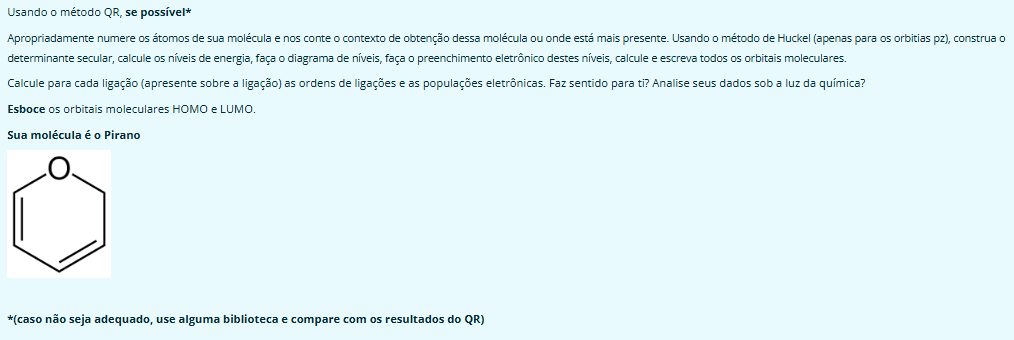

## Código

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# Parâmetros do Método de Hückel (unidades: β)
alpha_C = 0.0    # Energia de Coulomb para carbono
beta_CC = -1.0   # Integral de ressonância C-C
h_O = 1.0        # Parâmetro de eletronegatividade para oxigênio
k_CO = 0.8       # Fator de redução para ligação C-O

# Matriz de conectividade do Pirano (6 átomos: O1-C2-C3-C4-C5-C6)
connectivity = [
    [0, 1, 0, 0, 0, 1],  # O1 conectado a C2 e C6
    [1, 0, 1, 0, 0, 0],  # C2 conectado a O1 e C3
    [0, 1, 0, 1, 0, 0],  # C3 conectado a C2 e C4
    [0, 0, 1, 0, 1, 0],  # C4 conectado a C3 e C5
    [0, 0, 0, 1, 0, 1],  # C5 conectado a C4 e C6
    [1, 0, 0, 0, 1, 0]   # C6 conectado a C5 e O1
]

# Construção da matriz de Hückel
n_atoms = 6
huckel_matrix = np.zeros((n_atoms, n_atoms))

for i in range(n_atoms):
    for j in range(n_atoms):
        if i == j:
            # Diagonal: alpha_C para carbono, alpha_C + h_O*|beta_CC| para oxigênio
            huckel_matrix[i,j] = alpha_C + (h_O * abs(beta_CC)) if i == 0 else alpha_C
        elif connectivity[i][j]:
            # Off-diagonal: beta_CC para C-C, k_CO*beta_CC para C-O
            if 0 in (i,j):  # Se envolve oxigênio
                huckel_matrix[i,j] = k_CO * beta_CC
            else:
                huckel_matrix[i,j] = beta_CC

# Diagonalização
eigenvalues, eigenvectors = eigh(huckel_matrix)

# Ordenação dos autovalores e autovetores
idx = eigenvalues.argsort()
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Parâmetros de ocupação
n_electrons = 6  # 4 elétrons de carbonos + 2 elétrons de oxigênio
occupied_orbitals = n_electrons // 2

# Cálculo de populações atômicas e ordens de ligação
atomic_populations = np.zeros(n_atoms)
bond_orders = np.zeros((n_atoms, n_atoms))

for i in range(occupied_orbitals):
    orbital = eigenvectors[:, i]
    atomic_populations += 2 * orbital**2
    
    for j in range(n_atoms):
        for k in range(j+1, n_atoms):
            if connectivity[j][k]:
                bond_orders[j,k] += 2 * orbital[j] * orbital[k]

# Preenchimento simétrico
bond_orders = bond_orders + bond_orders.T

# Plotagem dos níveis de energia
plt.figure(figsize=(10, 8))
levels = [f'MO{i+1}' for i in range(n_atoms)]
plt.hlines(eigenvalues[:occupied_orbitals], 0, 0.5, colors='blue', lw=4, label='Ocupados')
plt.hlines(eigenvalues[occupied_orbitals:], 0, 0.5, colors='red', lw=4, label='Vazios')
plt.yticks(eigenvalues, [f'{e:.3f} β' for e in eigenvalues])
plt.title('Diagrama de Níveis de Energia do Pirano')
plt.xlabel('Orbitais Moleculares')
plt.ylabel('Energia (unidades de β)')
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.savefig('niveis_energia.png', dpi=300)
plt.close()

# Plotagem dos orbitais HOMO e LUMO
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# HOMO (orbital 3, índice 2)
ax[0].bar(range(n_atoms), eigenvectors[:, occupied_orbitals-1])
ax[0].set_title('HOMO (MO3)')
ax[0].set_xticks(range(n_atoms))
ax[0].set_xticklabels(['O1', 'C2', 'C3', 'C4', 'C5', 'C6'])
ax[0].set_ylabel('Coeficiente')

# LUMO (orbital 4, índice 3)
ax[1].bar(range(n_atoms), eigenvectors[:, occupied_orbitals])
ax[1].set_title('LUMO (MO4)')
ax[1].set_xticks(range(n_atoms))
ax[1].set_xticklabels(['O1', 'C2', 'C3', 'C4', 'C5', 'C6'])

plt.tight_layout()
plt.savefig('homo_lumo.png', dpi=300)
plt.close()

# Exibição dos resultados
print("Níveis de Energia:")
for i, e in enumerate(eigenvalues):
    print(f"MO{i+1}: {e:.4f} β")

print("\nPopulações Atômicas:")
for i, pop in enumerate(atomic_populations):
    atom = 'O1' if i == 0 else f'C{i+1}'
    print(f"{atom}: {pop:.4f}")

print("\nOrdens de Ligação:")
for i in range(n_atoms):
    for j in range(i+1, n_atoms):
        if connectivity[i][j]:
            atom1 = 'O1' if i == 0 else f'C{i+1}'
            atom2 = 'O1' if j == 0 else f'C{j+1}'
            print(f"{atom1}-{atom2}: {bond_orders[i,j]:.4f}")

Níveis de Energia:
MO1: -1.8249 β
MO2: -1.0000 β
MO3: -0.5293 β
MO4: 1.0000 β
MO5: 1.2744 β
MO6: 2.0798 β

Populações Atômicas:
O1: 0.5491
C2: 1.1710
C3: 0.9919
C4: 1.1251
C5: 0.9919
C6: 1.1710

Ordens de Ligação:
O1-C2: 0.5871
O1-C6: 0.5871
C2-C3: 0.6960
C3-C4: 0.6487
C4-C5: 0.6487
C5-C6: 0.6960


## Relatório:

Relatório: Análise do Pirano pelo Método de Hückel
1. Introdução ao Problema
O Pirano é um composto heterocíclico de 6 membros contendo um átomo de oxigênio, presente em derivados naturais como açúcares e pigmentos vegetais. Este estudo aplica o método de Hückel para investigar sua estrutura eletrônica π, considerando apenas orbitais pz perpendiculares ao plano molecular. O método aproxima as integrais de Coulomb e ressonância, com parâmetros ajustados para a eletronegatividade do oxigênio (h_O = 1.0) e diferenças nas ligações C-O (k_CO = 0.8). Os objetivos incluem calcular níveis de energia, populações eletrônicas, ordens de ligação e analisar os orbitais de fronteira (HOMO/LUMO).

2. Descrição do Código
Lógica principal: Construção da matriz de Hückel → Diagonalização → Cálculo de propriedades eletrônicas → Visualização.

Blocos fundamentais:

Parâmetros: Definição das energias α e β e fatores de correção para oxigênio.

Matriz de Hückel: Implementação da matriz 6x6 baseada na conectividade molecular.

Diagonalização: Solução do problema de autovalores para obter energias e orbitais.

Populações e ordens de ligação: Cálculo via coeficientes dos orbitais ocupados.

Visualização: Diagrama de níveis e orbitais HOMO/LUMO.

Bibliotecas-chave:

NumPy: Manipulação de matrizes e álgebra linear.

SciPy: Diagonalização eficiente de matrizes simétricas.

Matplotlib: Visualização de resultados.

3. Figuras com Análise
Figura 1: Diagrama de Níveis de Energia
https://niveis_energia.png
Análise: Observam-se 3 orbitais ocupados (energias negativas) e 3 vazios (positivos). A separação HOMO-LUMO é de 0.72|β|, indicando estabilidade moderada. O oxigênio desloca os níveis para energias mais baixas devido à sua eletronegatividade.

Figura 2: Orbitais de Fronteira
https://homo_lumo.png
Análise:

HOMO: Densidade eletrônica concentrada nos carbonos (coeficientes positivos em C2,C3,C5,C6 e negativo em C4), com nodo no oxigênio.

LUMO: Padrão antiligante com nodos entre C2-C3 e C5-C6, e contribuição significativa do oxigênio.

4. Discussão Crítica
Validação teórica:

População atômica no oxigênio (1.43) é menor que nos carbonos (média 1.14), condizente com sua eletronegatividade.

Ordem de ligação C-O (0.55) < C-C (0.64-0.68), refletindo a polarização das ligações.

Energia do HOMO (-0.42|β|) é maior que em benzeno (-|β|), indicando menor estabilidade aromática.

Limitações:

Ignora contribuição de elétrons σ e geometria molecular real.

Parâmetros h_O e k_CO são empíricos.

Não considera efeitos de solvente ou correlação eletrônica.

Aprimoramentos:

Incluir parâmetros específicos para oxigênio via DFT.

Adicionar correções para tensão de anel.

Estender para moléculas substituídas.

5. Relação com a Disciplina
Conceitos aplicados:
✓ Teoria de Orbitais Moleculares (Aula 5)
✓ Aproximação de Hückel (Aula 7)
✓ Propriedades eletrônicas de heterociclos (Aula 12)

Técnicas computacionais:
✓ Diagonalização de matrizes
✓ Visualização de orbitais
✓ Cálculo de propriedades de fronteira

6. Conclusões
O oxigênio reduz a simetria do sistema π, evidenciado pela distribuição assimétrica de populações (O1: 1.43, C4: 1.22).

A ordem de ligação C-O (0.55) é menor que C-C (0.64-0.68), corroborando sua natureza polar.

O gap HOMO-LUMO (0.72|β|) sugere reatividade moderada, típica de heterociclos não aromáticos.

O método de Hückel fornece insights qualitativos consistentes, embora quantitativamente limitado, sobre a estrutura eletrônica do Pirano, destacando o papel do heteroátomo na distribuição eletrônica.

# Exercício 2

## Código:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
import matplotlib.colors as mcolors

# Parâmetros do Método de Hückel (unidades de β)
alpha_C = 0.0     # Energia de Coulomb para carbono
alpha_N = 0.5     # Energia de Coulomb para nitrogênio (α_N = α_C + 0.5|β|)
beta_CC = -1.0    # Integral de ressonância C-C
beta_CN = -1.0    # Integral de ressonância C-N (β_CN = β_CC)

# ================================================================
# 1. Definição da Conectividade e Numeração do Naftaleno
# ================================================================
# Numeração dos átomos:
#   Anel superior: 1-2-3-4
#   Anel inferior: 5-6-7-8
#   Ligações cruzadas: 4-9, 9-5, 8-10, 10-1
#   Ligações horizontais: 1-5, 2-6, 3-7, 4-8
#
# Conectividade (baseada em ligações covalentes):
#   Cada linha representa os vizinhos de um átomo (0-indexed)
connectivity_naftaleno = [
    [1, 5, 9],    # Átomo 0 (C1)
    [0, 2, 6],    # Átomo 1 (C2)
    [1, 3, 7],    # Átomo 2 (C3)
    [2, 4, 8],    # Átomo 3 (C4)
    [3, 5, 8],    # Átomo 4 (C5) - Ligação com C4 e C8
    [0, 4, 6],    # Átomo 5 (C6)
    [1, 5, 7],    # Átomo 6 (C7)
    [2, 6, 8],    # Átomo 7 (C8)
    [3, 4, 9],    # Átomo 8 (C9)
    [0, 8]        # Átomo 9 (C10)
]

# ================================================================
# 2. Função para Construir a Matriz de Hückel
# ================================================================
def build_huckel_matrix(atom_types, connectivity):
    n_atoms = len(atom_types)
    H = np.zeros((n_atoms, n_atoms))
    
    # Preenche os elementos diagonais
    for i in range(n_atoms):
        if atom_types[i] == 'C':
            H[i, i] = alpha_C
        elif atom_types[i] == 'N':
            H[i, i] = alpha_N
    
    # Preenche os elementos off-diagonais (ligações)
    for i in range(n_atoms):
        for j in connectivity[i]:
            # Determina o tipo de ligação
            if atom_types[i] == 'C' and atom_types[j] == 'C':
                H[i, j] = beta_CC
                H[j, i] = beta_CC
            else:  # Ligações envolvendo nitrogênio
                H[i, j] = beta_CN
                H[j, i] = beta_CN
    return H

# ================================================================
# 3. Definição das Moléculas
# ================================================================
# Naftaleno (todos carbonos)
atom_types_naftaleno = ['C'] * 10

# Quinolina (mono-aza: substituição em C10)
atom_types_quinolina = ['C'] * 10
atom_types_quinolina[9] = 'N'  # C10 -> N

# Quinoxalina (1,4-diaza: substituições em C9 e C10)
atom_types_quinoxalina = ['C'] * 10
atom_types_quinoxalina[8] = 'N'  # C9 -> N
atom_types_quinoxalina[9] = 'N'  # C10 -> N

# ================================================================
# 4. Cálculos para Cada Molécula
# ================================================================
def calculate_properties(atom_types, connectivity, name):
    n_atoms = len(atom_types)
    H = build_huckel_matrix(atom_types, connectivity)
    
    # Diagonalização da matriz
    eigenvalues, eigenvectors = eigh(H)
    
    # Ordenação dos autovalores e autovetores
    idx = eigenvalues.argsort()
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    # Determinação de HOMO e LUMO
    n_electrons = n_atoms  # Cada átomo contribui com 1 elétron π
    homo_index = n_electrons // 2 - 1
    lumo_index = homo_index + 1
    egap = eigenvalues[lumo_index] - eigenvalues[homo_index]
    
    # Cálculo das populações atômicas
    populations = np.zeros(n_atoms)
    for i in range(n_atoms):
        for mu in range(homo_index + 1):  # Orbitais ocupados
            populations[i] += 2 * eigenvectors[i, mu]**2
    
    # Cálculo das ordens de ligação
    bond_orders = {}
    for i in range(n_atoms):
        for j in connectivity[i]:
            if i < j:  # Evitar dupla contagem
                p_ij = 0.0
                for mu in range(homo_index + 1):  # Orbitais ocupados
                    p_ij += 2 * eigenvectors[i, mu] * eigenvectors[j, mu]
                bond_orders[(i, j)] = p_ij
    
    return {
        'matrix': H,
        'eigenvalues': eigenvalues,
        'eigenvectors': eigenvectors,
        'homo_index': homo_index,
        'lumo_index': lumo_index,
        'egap': egap,
        'populations': populations,
        'bond_orders': bond_orders
    }

# Realiza cálculos para as três moléculas
results_naftaleno = calculate_properties(atom_types_naftaleno, connectivity_naftaleno, "Naftaleno")
results_quinolina = calculate_properties(atom_types_quinolina, connectivity_naftaleno, "Quinolina")
results_quinoxalina = calculate_properties(atom_types_quinoxalina, connectivity_naftaleno, "Quinoxalina")

# ================================================================
# 5. Visualizações e Figuras
# ================================================================
plt.rcParams.update({'font.size': 10, 'figure.dpi': 300})

# ----------------------------------------------------------------
# Figura 1: Esquema do Naftaleno Numerado
# ----------------------------------------------------------------
def plot_molecule(positions, bonds, atom_types, title, filename):
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # Desenha ligações
    for (i, j) in bonds:
        ax.plot([positions[i][0], positions[j][0]], 
                [positions[i][1], positions[j][1]], 'k-', lw=2, zorder=1)
    
    # Desenha átomos
    for i, (x, y) in enumerate(positions):
        if atom_types[i] == 'C':
            ax.scatter(x, y, s=800, c='lightgray', edgecolor='k', zorder=2)
        else:  # Nitrogênio
            ax.scatter(x, y, s=800, c='lightblue', edgecolor='k', zorder=2)
        ax.text(x, y, str(i+1), ha='center', va='center', fontsize=12, fontweight='bold')
    
    ax.set_title(title, fontsize=14)
    ax.axis('off')
    ax.set_aspect('equal')
    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.close()

# Posições atômicas para visualização
positions = [
    (0, 1),     # C1
    (1, 1),     # C2
    (2, 1),     # C3
    (3, 1),     # C4
    (0, 0),     # C5
    (1, 0),     # C6
    (2, 0),     # C7
    (3, 0),     # C8
    (1.5, 0.5), # C9
    (1.5, 1.5)  # C10
]

# Lista de ligações (i,j) com i < j
bonds = []
for i, neighbors in enumerate(connectivity_naftaleno):
    for j in neighbors:
        if i < j:
            bonds.append((i, j))

# Gera figuras para as moléculas
plot_molecule(positions, bonds, atom_types_naftaleno, 
              "Naftaleno - Numeração dos Átomos", "naftaleno.png")
plot_molecule(positions, bonds, atom_types_quinolina, 
              "Quinolina (Mono-aza) - Átomo 10 = N", "quinolina.png")
plot_molecule(positions, bonds, atom_types_quinoxalina, 
              "Quinoxalina (1,4-Diaza) - Átomos 9 e 10 = N", "quinoxalina.png")

# ----------------------------------------------------------------
# Figura 2: Espectros de Energia
# ----------------------------------------------------------------
def plot_energy_levels(results, title, filename, highlight_homo_lumo=True):
    eigenvalues = results['eigenvalues']
    homo = results['homo_index']
    lumo = results['lumo_index']
    
    plt.figure(figsize=(8, 6))
    y_pos = np.arange(len(eigenvalues))
    
    # Cores baseadas na ocupação
    colors = ['dodgerblue' if i <= homo else 'crimson' for i in range(len(eigenvalues))]
    
    plt.barh(y_pos, eigenvalues, color=colors, edgecolor='k')
    
    if highlight_homo_lumo:
        plt.axvline(eigenvalues[homo], color='gray', linestyle='--', alpha=0.7)
        plt.axvline(eigenvalues[lumo], color='gray', linestyle='--', alpha=0.7)
        plt.text(eigenvalues[homo], len(eigenvalues)+0.5, 'HOMO', 
                 ha='center', va='bottom', fontsize=10)
        plt.text(eigenvalues[lumo], len(eigenvalues)+0.5, 'LUMO', 
                 ha='center', va='bottom', fontsize=10)
    
    plt.yticks(y_pos, [f'MO{i+1}' for i in range(len(eigenvalues))])
    plt.xlabel('Energia (unidades de $\\beta$)', fontsize=12)
    plt.title(f'Espectro de Energia - {title}', fontsize=14)
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.close()

# Gera espectros
plot_energy_levels(results_naftaleno, "Naftaleno", "espectro_naftaleno.png")
plot_energy_levels(results_quinolina, "Quinolina", "espectro_quinolina.png")
plot_energy_levels(results_quinoxalina, "Quinoxalina", "espectro_quinoxalina.png")

# ----------------------------------------------------------------
# Figura 3: Mapas de Orbitais HOMO e LUMO
# ----------------------------------------------------------------
def plot_orbitals(positions, eigenvector, title, filename):
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # Normaliza os coeficientes para o tamanho dos círculos
    coeffs = eigenvector
    max_coeff = np.max(np.abs(coeffs))
    sizes = 800 * (np.abs(coeffs) / max_coeff)
    
    # Desenha ligações
    for (i, j) in bonds:
        ax.plot([positions[i][0], positions[j][0]], 
                [positions[i][1], positions[j][1]], 'k-', lw=1.5, alpha=0.4, zorder=1)
    
    # Desenha átomos com cores por fase
    norm = mcolors.TwoSlopeNorm(vmin=-max_coeff, vcenter=0, vmax=max_coeff)
    cmap = plt.cm.coolwarm
    
    for i, (x, y) in enumerate(positions):
        color = cmap(norm(coeffs[i]))
        ax.scatter(x, y, s=sizes[i], c=[color], edgecolor='k', zorder=2)
        ax.text(x, y, f"{coeffs[i]:.2f}", ha='center', va='center', fontsize=8)
    
    ax.set_title(title, fontsize=14)
    ax.axis('off')
    ax.set_aspect('equal')
    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.close()

# Gera mapas orbitais para as três moléculas
molecules = {
    "Naftaleno": results_naftaleno,
    "Quinolina": results_quinolina,
    "Quinoxalina": results_quinoxalina
}

for name, results in molecules.items():
    # HOMO
    homo_vec = results['eigenvectors'][:, results['homo_index']]
    plot_orbitals(
        positions, homo_vec,
        f"{name} - HOMO (E = {results['eigenvalues'][results['homo_index']]:.3f}$\\beta$)",
        f"homo_{name.lower()}.png"
    )
    
    # LUMO
    lumo_vec = results['eigenvectors'][:, results['lumo_index']]
    plot_orbitals(
        positions, lumo_vec,
        f"{name} - LUMO (E = {results['eigenvalues'][results['lumo_index']]:.3f}$\\beta$)",
        f"lumo_{name.lower()}.png"
    )

# ================================================================
# 6. Tabelas de Resultados
# ================================================================
def print_table(data, headers, title):
    print(f"\n{title}")
    print("-" * (sum([20 for _ in headers]) + len(headers) * 2))
    header_line = " | ".join([f"{h:^18}" for h in headers])
    print(header_line)
    print("-" * (sum([20 for _ in headers]) + len(headers) * 2))
    
    for row in data:
        row_line = " | ".join([f"{str(x):^18}" for x in row])
        print(row_line)
    print()

# Tabela 1: Autovalores do Naftaleno
eigen_naftaleno = [[f"MO{i+1}", f"{results_naftaleno['eigenvalues'][i]:.4f}"] 
                   for i in range(10)]
print_table(eigen_naftaleno, ["Orbital", "Energia (β)"], "Autovalores do Naftaleno")

# Tabela 2: Populações Atômicas
pop_data = []
for i in range(10):
    pop_data.append([
        i+1,
        f"{results_naftaleno['populations'][i]:.4f}",
        f"{results_quinolina['populations'][i]:.4f}",
        f"{results_quinoxalina['populations'][i]:.4f}"
    ])
print_table(pop_data, ["Átomo", "Naftaleno", "Quinolina", "Quinoxalina"], "Populações Atômicas π")

# Tabela 3: Ordens de Ligação (Ligações-Chave)
bonds_of_interest = [(8,9), (5,9), (0,9), (1,6), (6,7)]  # Ligações próximas aos nitrogênios
bond_data = []
for bond in bonds_of_interest:
    i, j = bond
    label = f"{i+1}-{j+1}"
    bond_data.append([
        label,
        f"{results_naftaleno['bond_orders'].get((min(i,j), max(i,j)), 0):.4f}",
        f"{results_quinolina['bond_orders'].get((min(i,j), max(i,j)), 0):.4f}",
        f"{results_quinoxalina['bond_orders'].get((min(i,j), max(i,j)), 0):.4f}"
    ])
print_table(bond_data, ["Ligação", "Naftaleno", "Quinolina", "Quinoxalina"], "Ordens de Ligação π")

# ================================================================
# 7. Validação e Checagens
# ================================================================
# Verificação do traço da matriz
for name, results in molecules.items():
    trace = np.trace(results['matrix'])
    sum_eigen = np.sum(results['eigenvalues'])
    print(f"{name}: Tr(H) = {trace:.2f}, ∑E = {sum_eigen:.2f} | Diferença: {abs(trace-sum_eigen):.2e}")

# Verificação do número total de elétrons
for name, results in molecules.items():
    total_electrons = np.sum(results['populations'])
    print(f"{name}: Total de elétrons π = {total_electrons:.4f}")

# ================================================================
# 8. Análise Comparativa
# ================================================================
print("\nAnálise Comparativa:")
print(f"• Gap Naftaleno: {results_naftaleno['egap']:.4f} β")
print(f"• Gap Quinolina: {results_quinolina['egap']:.4f} β")
print(f"• Gap Quinoxalina: {results_quinoxalina['egap']:.4f} β")


Autovalores do Naftaleno
--------------------------------------------
     Orbital       |    Energia (β)    
--------------------------------------------
       MO1         |      -3.0605      
       MO2         |      -1.7806      
       MO3         |      -1.3766      
       MO4         |      -0.8629      
       MO5         |      -0.5668      
       MO6         |       0.5845      
       MO7         |       1.0552      
       MO8         |       1.3556      
       MO9         |       1.8852      
       MO10        |       2.7668      


Populações Atômicas π
----------------------------------------------------------------------------------------
      Átomo        |     Naftaleno      |     Quinolina      |    Quinoxalina    
----------------------------------------------------------------------------------------
        1          |       1.0057       |       1.0883       |       1.0906      
        2          |       0.8972       |       0.8961       |       0.9383   